## Problems to Solve

Up till now, most of your experience with integration has likely been integrating functions that have anti-derivatives. While this is kind of integration is problematic when you have data that must be integrated (e.g., using measures of position to determine potential energy), we will focus on functions for which there are no anti-derivatives.

Consider a line of charge that lives on the x-axis. It exists from $x=-1$ to $x=2$, and distribution of that charge is given by,

$$\lambda(x) = 3e^{-x^2}.$$

In this problem, you will work through this Jupyter notebook to determine the total charge one this line by performing the integral,

$$Q = \int_{-1}^2 3e^{-x^2} dx.$$

As you work through this problem, you will work through the following activities:

1. Plot the distribution of charge λ(x) between −1 ≤ x ≤ 2.
2. Use ``sympy`` to compute the integral of the function. What does it return? Discuss the function. Is it analytic?
3. Apply the trapezoidal rule to compute the integral of this function. Use 10 equal width steps. To receive full credit, you must write the code to do this and not use built-in integration functions of ``scipy``.
4. Apply the trapezoidal rule to compute the integral again but this time use 100 equal width steps.
5. Apply Simpson’s rule to compute the integral of this function. Use 10 equal width steps. To receive full credit, you must write the code to do this and not use built-in integration functions of “scipy”.
Hint: for the summations that require you to distinguish between even and odd terms, review the “range” function, which allows you to specify how many steps to take in between each term in a sum. Also you will need to use two ”for” statements; one for the odd sum and one for the even sum in the Simpson’s rule equation.
6. Apply Simpson’s rule to compute the integral of this function again. This time use 100 equal width steps.
7. Look up ``scipy.integrate`` built-in quadrature function, ``quad.`` Use it to compute the same integral and compare its result to what your code produced. What are the two variables that ``quad`` gives you by default?
8. Explain how the trapezoidal rule and Simpson's rule are different. How do they compute the integrals? Explain how the [Gaussian quadrature](https://en.wikipedia.org/wiki/Gaussian_quadrature), which is what ``quad`` and its cousins in the ``scipy.integrate`` library do, is different from both of them.

In [1]:
import sympy as sp                 ## Import symbolic python library
import numpy as np                 ## Import basic scientific computing library
import matplotlib.pyplot as plt    ## Import plotting library
from scipy.integrate import quad   ## Import a specific integrator from scipy.intergrate library

## Make sure our plots show up inline
%matplotlib inline

## Add some style to the printing of sympy functions and matplotlib plots
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
plt.style.use('ggplot')

Text(0, 0.5, 'λ(x)')

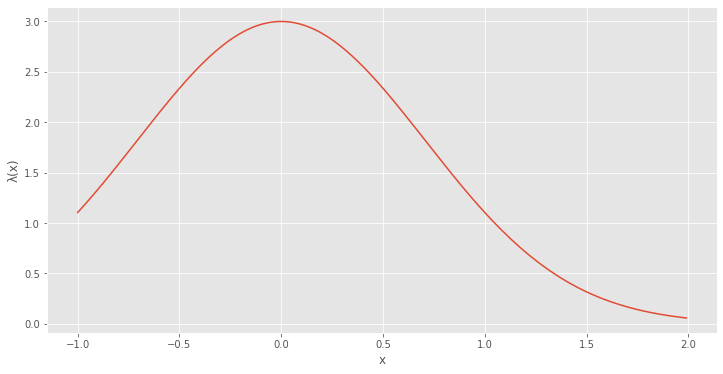

In [2]:
# 1)
x = np.arange(-1,2,0.01)
lam = 3*np.exp(-x**2)

plt.figure(figsize=(12,6))
plt.plot(x,lam)
plt.xlabel('x')
plt.ylabel('λ(x)')

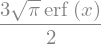

In [3]:
# 2)
x=sp.Symbol('x')
sp.integrate(3*sp.exp(-x**2),x)

It returns erf(x), which is the error function. This is defined as $$erf(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2} dt.$$ It is used here because the function cannot be integrated analytically.


In [4]:
# 3)
def lam(x):
    return 3*np.exp(-x**2)

N = 10
a = -1
b = 2
h = (b-a)/N
s = 0       # define variable s to be 0

s = 0.5*lam(a) + 0.5*lam(b)
for k in range(1,N):
    s += lam(a+k*h)
    
I = s*h
print(I)

4.8684889045431685


In [5]:
# 4)
N = 100
a = -1
b = 2
h = (b-a)/N
s = 0       # define variable s to be 0

s = 0.5*lam(a) + 0.5*lam(b)
for k in range(1,N):
    s += lam(a+k*h)

I = s*h
print(I)

4.886534538407494


In [6]:
# 5)
#simpson's rule
N = 10 # EVEN number of parabolic segments
a = -1
b = 2
h = (b-a)/N
s = 0       # define variable s to be 0

s = lam(a) + lam(b)
for k in range(1,N):
    if k%2 == 0: # even
        s += 2*lam(a+k*h)
    else: # odd
        s += 4*lam(a+k*h)

I = s*h/3
print(I)

4.886809571523261


In [7]:
# 6)
#simpson's rule
N = 100 # EVEN number of parabolic segments
a = -1
b = 2
h = (b-a)/N
s = 0       # define variable s to be 0

s = lam(a) + lam(b)
for k in range(1,N):
    if k%2 == 0: # even
        s += 2*lam(a+k*h)
    else: # odd
        s += 4*lam(a+k*h)

I = s*h/3
print(I)

4.886716580694897


In [8]:
# 7)
I = quad(lam, -1, 2)
print(I)

(4.886716570724547, 4.014028567897086e-10)


The result is the same as my Simpson's rule N=100 for the first 7 decimal places. The second variable is an estimate of the absolute error of the result from the true value.

### 8)

The trapezoidal rule uses the average of the function at the edges of each interval to find the area under the curve to estimate the function. Simpson's rule works in a similar way except it also takes into account the curvature of the interval to find the area under the curve to estimate the function. Gaussian quadrature uses a more complicated method where it considers the function at different points in the interval and uses a weighted sum of the function at those points to estimate the function.